In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('./prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.rename(index=str, columns={"ProsperRating (numeric)": "ProsperRatingNumeric", "ProsperRating (Alpha)":"ProsperRatingAlpha" ,"ListingCategory (numeric)":"ListingCategoryNumeric", "TradesNeverDelinquent (percentage)":"TradesNeverDelinquentPercentage"}, inplace=True)

In [5]:
df_state = pd.read_csv('state_abbr.csv')
df_state.rename(index=str, columns={"State Code": "StateAbbr"}, inplace=True)
df_state.head()
df=df.merge(df_state, how='inner', left_on='BorrowerState', right_on='StateAbbr')

# Questions to Ask

- What parameters judges APR for a loan?
- What causes the loan to become default or not closed?
- what factors influence ppl to close the loan in time?


# Univariate analysis.

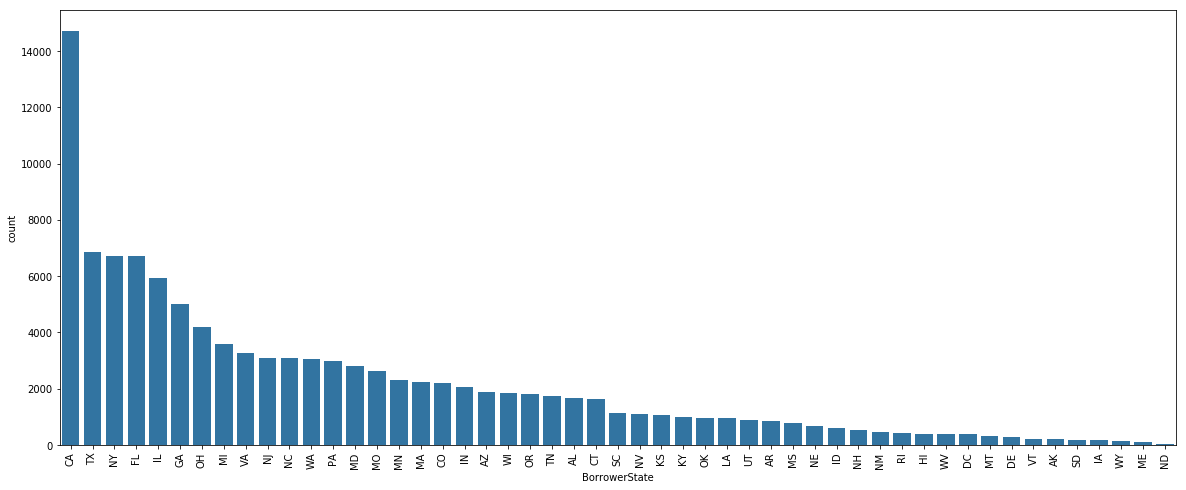

In [6]:
#Loan Origination State
base_color = sns.color_palette()[0]
state_order = df['BorrowerState'].value_counts().index
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='BorrowerState', color=base_color, order=state_order);
plt.xticks(rotation = 90);

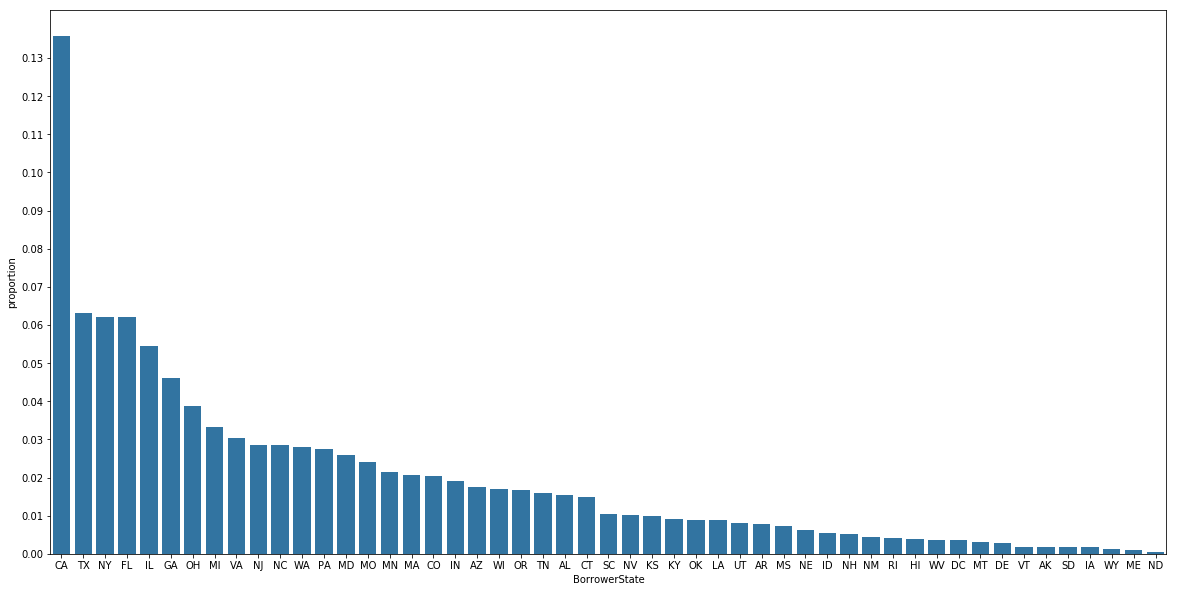

In [7]:
#Relative Frequency

# get proportion taken by most common group for derivation
# of tick marks
n_points = df.shape[0]
max_count = df['BorrowerState'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.01)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]


# create the plot
base_color = sns.color_palette()[0]
plt.figure(figsize=(20,10))
sns.countplot(data = df, x = 'BorrowerState', color = base_color, order=state_order);
plt.yticks(tick_props * n_points, tick_names);
plt.ylabel('proportion');

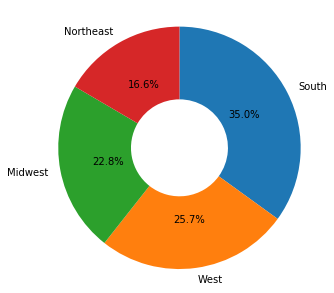

In [8]:
sorted_counts = df['Region'].value_counts();
plt.figure(figsize=(5,5))
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%',
        counterclock = False, wedgeprops = {'width' : 0.6});
plt.axis('square');

In [9]:
df.CreditGrade.value_counts()

C     4699
D     4076
B     3752
AA    3017
A     2828
HR    2603
E     2376
NC      87
Name: CreditGrade, dtype: int64

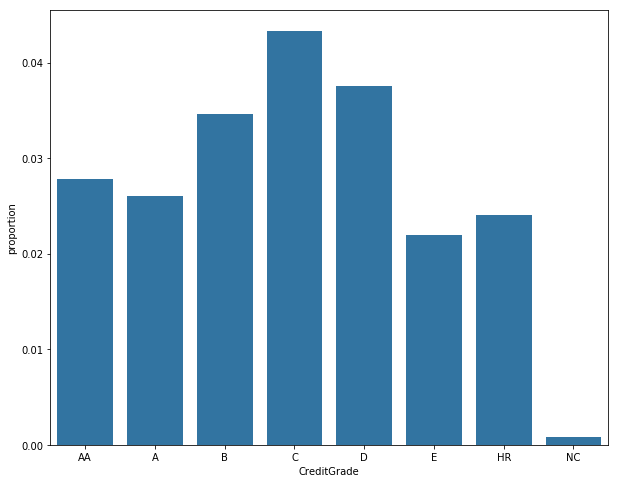

In [10]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = df.shape[0]
max_count = df['CreditGrade'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.01)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

creditGradeIndex = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']

# create the plot
base_color = sns.color_palette()[0]
plt.figure(figsize=(10,8))
sns.countplot(data = df, x = 'CreditGrade', color = base_color, order=creditGradeIndex);
plt.yticks(tick_props * n_points, tick_names);
plt.ylabel('proportion');

In [12]:
df.Term.value_counts()

36    82263
60    24545
12     1614
Name: Term, dtype: int64

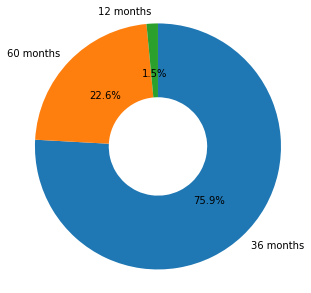

In [13]:
sorted_counts = df['Term'].value_counts();
plt.figure(figsize=(5,5))
labels = [ '{0} months'.format(i) for i in  sorted_counts.index]

plt.pie(sorted_counts, labels = labels, startangle = 90, autopct='%1.1f%%',
        counterclock = False, wedgeprops = {'width' : 0.6});
plt.axis('square');

In [14]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRatingNumeric', 'ProsperRatingAlpha',
       'ProsperScore', 'ListingCategoryNumeric', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankca

In [15]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 34191
Chargedoff                10952
Defaulted                  4429
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     2
Name: LoanStatus, dtype: int64

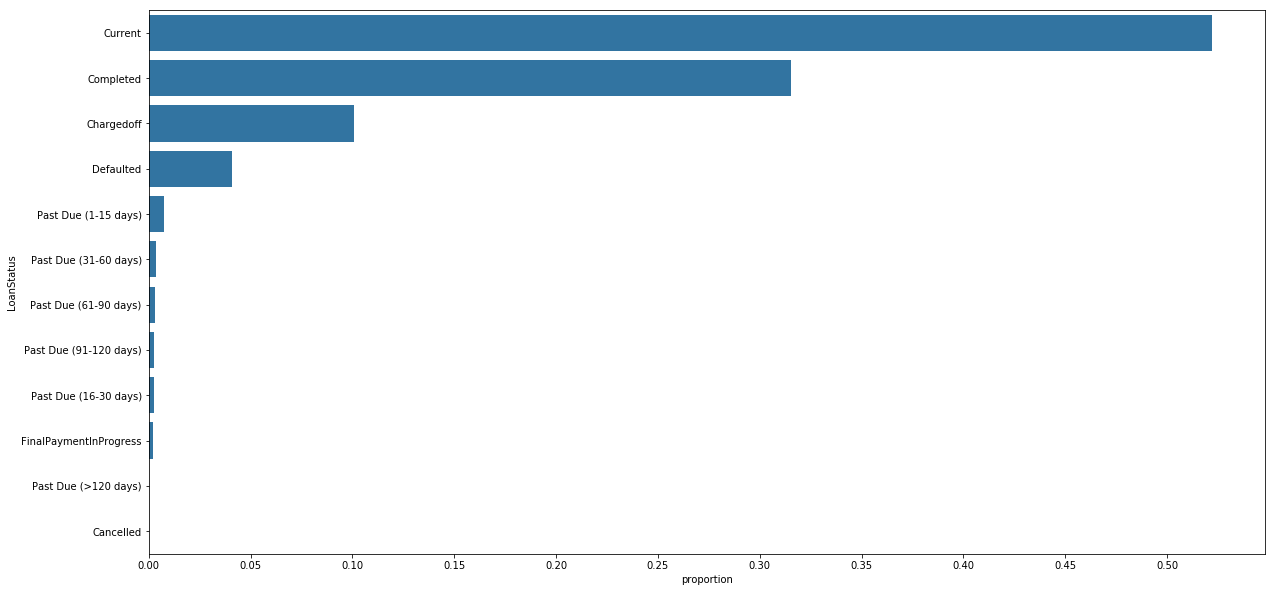

In [16]:
#Relative Frequency

# get proportion taken by most common group for derivation
# of tick marks
n_points = df.shape[0]
max_count = df['LoanStatus'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]


# create the plot
base_color = sns.color_palette()[0]
plt.figure(figsize=(20,10))
sns.countplot(data = df, y = 'LoanStatus', color = base_color, order=df['LoanStatus'].value_counts().index);
plt.xticks(tick_props * n_points, tick_names);
plt.xlabel('proportion');

In [17]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRatingNumeric', 'ProsperRatingAlpha',
       'ProsperScore', 'ListingCategoryNumeric', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankca

In [20]:
df.IncomeRange.value_counts()

$25,000-49,999    31520
$50,000-74,999    30638
$100,000+         17175
$75,000-99,999    16737
$1-24,999          7040
Not displayed      3928
Not employed        781
$0                  603
Name: IncomeRange, dtype: int64

In [21]:
#Historgram Example
df.PercentFunded.value_counts();

In [22]:
#Historgram
df.Recommendations.value_counts()

0     104414
1       3307
2        537
3        101
4         24
5         14
7          5
9          5
6          3
8          3
16         2
18         2
24         1
14         1
19         1
21         1
39         1
Name: Recommendations, dtype: int64

In [23]:
df.ProsperRatingAlpha.value_counts() # Remove CreditGrade, use ProsperRatingAlpha.

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRatingAlpha, dtype: int64

In [24]:
df.Occupation.value_counts()

Other                                 27487
Professional                          13122
Computer Programmer                    4243
Executive                              4189
Teacher                                3649
Administrative Assistant               3547
Analyst                                3486
Sales - Commission                     3256
Accountant/CPA                         3131
Clerical                               2960
Sales - Retail                         2681
Skilled Labor                          2674
Retail Management                      2500
Nurse (RN)                             2448
Construction                           1738
Truck Driver                           1631
Police Officer/Correction Officer      1538
Laborer                                1535
Civil Service                          1418
Engineer - Mechanical                  1365
Food Service Management                1216
Military Enlisted                      1199
Food Service                    

In [25]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        24873
Self-employed     6029
Other             3806
Not available     2959
Part-time         1002
Not employed       801
Retired            762
Name: EmploymentStatus, dtype: int64

In [26]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRatingNumeric', 'ProsperRatingAlpha',
       'ProsperScore', 'ListingCategoryNumeric', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankca

In [27]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,State,StateAbbr,Region,Division
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,1.0,0,0,0.0,258,Colorado,CO,West,Mountain
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,1.0,0,0,0.0,1,Colorado,CO,West,Mountain
2,0F5034867864161084F3789,463083,2010-06-16 16:23:44.533000000,NaN,36,Completed,2013-07-03 00:00:00,0.11296,0.0920,0.0820,...,0.0,1.0,0,0,0.0,121,Colorado,CO,West,Mountain
3,0F8B3577039176552F6CC26,765126,2013-05-01 08:18:59.183000000,NaN,36,Current,NaN,0.15833,0.1299,0.1199,...,0.0,1.0,1,0,0.0,1,Colorado,CO,West,Mountain
4,10803531522293214B198DF,538785,2011-11-13 20:05:58.260000000,NaN,36,Completed,2012-05-31 00:00:00,0.35643,0.3199,0.3099,...,0.0,1.0,0,0,0.0,48,Colorado,CO,West,Mountain


In [28]:
df = df.drop(columns=[ 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled','TotalTrades','TradesNeverDelinquentPercentage', 'TradesOpenedLast6Months',
'Recommendations','InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount','Investors', 'Region', 'Division'], axis=1 )

In [29]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRatingNumeric', 'ProsperRatingAlpha',
       'ProsperScore', 'ListingCategoryNumeric', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange',
       'Inco

In [30]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRatingNumeric,ProsperScore,...,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded
count,1.084220e+05,108422.000000,108422.000000,108422.000000,108422.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,108422.000000,108422.000000,108422.000000,108422.000000,108422.000000,108422.000000,108422.000000,108422.000000,108422.000000,108422.000000
mean,6.560847e+05,41.075944,0.220237,0.193353,0.183304,0.168661,0.080306,0.096068,4.072243,5.950067,...,276.705326,4120.677833,3043.409414,1077.268419,-55.544483,-13.844964,681.493049,662.799253,23.802414,0.998511
std,3.106933e+05,10.639901,0.080724,0.075169,0.074925,0.068467,0.046764,0.030403,1.673227,2.376501,...,192.538718,4756.472747,4042.264095,1182.403195,61.217213,109.236846,2370.647303,2339.358650,264.404378,0.018366
min,6.537000e+03,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000
25%,4.528310e+05,36.000000,0.157130,0.134500,0.124600,0.115670,0.042400,0.074080,3.000000,4.000000,...,135.920000,962.640000,473.810000,272.922500,-74.300000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,6.185995e+05,36.000000,0.211480,0.184000,0.174000,0.161500,0.072400,0.091700,4.000000,6.000000,...,225.320000,2508.800000,1502.000000,698.805000,-35.380000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.113932e+05,36.000000,0.285740,0.252000,0.241100,0.224300,0.112000,0.116600,5.000000,8.000000,...,375.720000,5471.137500,4000.000000,1461.345000,-14.290000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.255725e+06,60.000000,0.423950,0.360000,0.340000,0.319900,0.366000,0.283700,7.000000,11.000000,...,2251.510000,40702.390000,35000.000000,15617.030000,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108422 entries, 0 to 108421
Data columns (total 73 columns):
ListingKey                             108422 non-null object
ListingNumber                          108422 non-null int64
ListingCreationDate                    108422 non-null object
CreditGrade                            23438 non-null object
Term                                   108422 non-null int64
LoanStatus                             108422 non-null object
ClosedDate                             49574 non-null object
BorrowerAPR                            108422 non-null float64
BorrowerRate                           108422 non-null float64
LenderYield                            108422 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRatingNumeric                   84853 non-null float64
ProsperRatingAlpha    

In [33]:
#Mapping...

#The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

categoryKey = np.arange(0,21)
categoryDescription = ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans']
data = {'LoanCategoryKey': categoryKey, 'LoanCategoryDescription':  categoryDescription}

df_loan_category = pd.DataFrame(data);

df_loan_category

,LoanCategoryKey,LoanCategoryDescription
0,0,Not Available
1,1,Debt Consolidation
2,2,Home Improvement
3,3,Business
4,4,Personal Loan
5,5,Student Use
6,6,Auto
7,7,Other
8,8,Baby&Adoption
9,9,Boat


In [34]:
df = df.merge(df_loan_category, how='inner', left_on='ListingCategoryNumeric', right_on='LoanCategoryKey')
df.drop(columns=['LoanCategoryKey'], inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108422 entries, 0 to 108421
Data columns (total 74 columns):
ListingKey                             108422 non-null object
ListingNumber                          108422 non-null int64
ListingCreationDate                    108422 non-null object
CreditGrade                            23438 non-null object
Term                                   108422 non-null int64
LoanStatus                             108422 non-null object
ClosedDate                             49574 non-null object
BorrowerAPR                            108422 non-null float64
BorrowerRate                           108422 non-null float64
LenderYield                            108422 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRatingNumeric                   84853 non-null float64
ProsperRatingAlpha    

In [36]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRatingNumeric', 'ProsperRatingAlpha',
       'ProsperScore', 'ListingCategoryNumeric', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange',
       'Inco

In [37]:
interesting_columns = ['ListingKey',  'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', \
                       'ClosedDate', 'BorrowerAPR', 'ProsperScore', 'BorrowerState', 'Occupation', \
                       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', \
                       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines',\
                       'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', \
                       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'RevolvingCreditBalance', \
                       'BankcardUtilization', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeVerifiable', \
                       'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', \
                       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding',\
                       'LoanOriginalAmount','LoanOriginationDate', 'MonthlyLoanPayment', 'LoanCategoryDescription']

In [38]:
df[interesting_columns].describe()

,Term,BorrowerAPR,ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,...,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,MonthlyLoanPayment
count,108422.000000,108422.000000,84853.000000,104572.000000,108422.000000,108422.000000,104594.000000,104594.000000,108350.000000,108422.000000,...,99940.000000,1.084220e+05,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000,108422.000000,108422.000000
mean,41.075944,0.220237,5.950067,96.783910,688.639022,707.639022,10.340842,9.291556,26.908389,7.095165,...,0.273243,5.650840e+03,1.421606,22.957685,22.294526,0.048619,8478.502865,2932.951338,8485.795798,276.705326
std,10.639901,0.080724,2.376501,94.668478,62.675030,62.675030,5.450085,5.019439,13.599618,4.600836,...,0.508688,7.593941e+03,0.764457,19.255545,18.836459,0.556736,7398.412133,3808.530914,6268.813039,192.538718
min,12.000000,0.006530,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,36.000000,0.157130,4.000000,26.000000,660.000000,679.000000,7.000000,6.000000,17.000000,4.000000,...,0.150000,3.250000e+03,1.000000,9.000000,9.000000,0.000000,3500.000000,0.000000,4000.000000,135.920000
50%,36.000000,0.211480,6.000000,68.000000,680.000000,699.000000,10.000000,9.000000,25.000000,6.000000,...,0.220000,4.708333e+03,1.000000,16.000000,15.000000,0.000000,6000.000000,1629.470000,6750.000000,225.320000
75%,36.000000,0.285740,8.000000,138.000000,720.000000,739.000000,13.000000,12.000000,35.000000,9.000000,...,0.320000,6.833333e+03,2.000000,33.000000,32.000000,0.000000,11000.000000,4130.250000,12000.000000,375.720000
max,60.000000,0.423950,11.000000,755.000000,880.000000,899.000000,59.000000,54.000000,136.000000,51.000000,...,10.010000,1.750003e+06,8.000000,141.000000,141.000000,21.000000,72499.000000,23450.950000,35000.000000,2251.510000


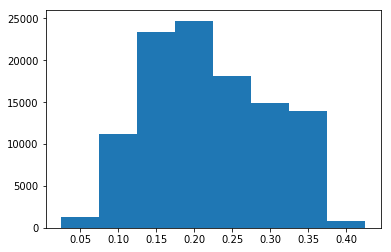

In [39]:
#some Histogram on credit score, Monthly Income, Loan Amount..
bin_edges = np.arange(0.025, df['BorrowerAPR'].max()+0.05, 0.05)
plt.hist(data = df, x = 'BorrowerAPR', bins = bin_edges);



In [40]:
#Loan Amount

df.LoanOriginalAmount.describe()


count    108422.000000
mean       8485.795798
std        6268.813039
min        1000.000000
25%        4000.000000
50%        6750.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

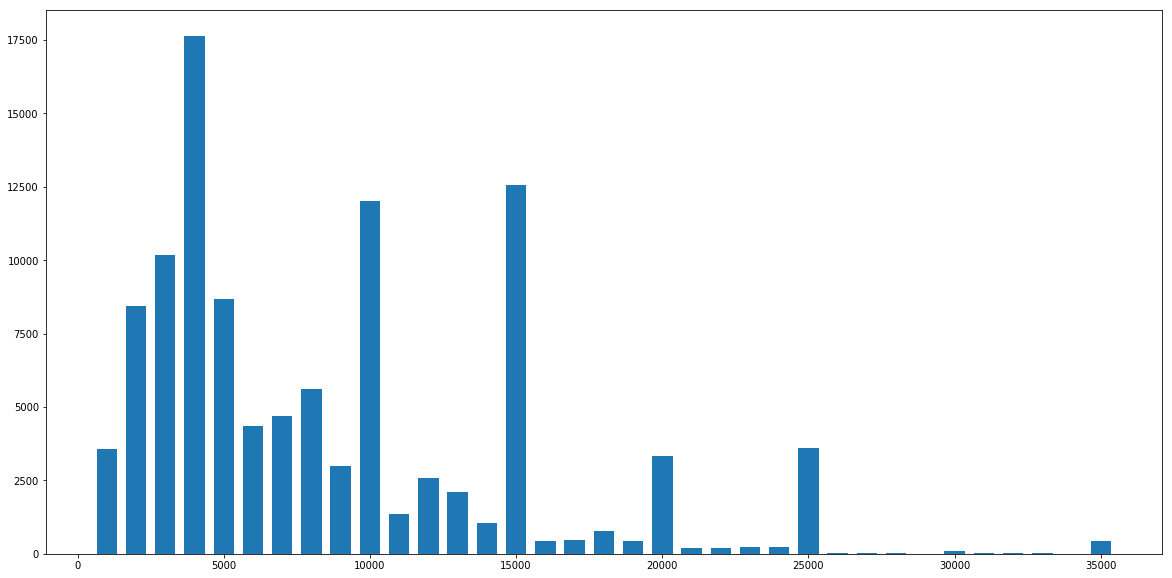

In [41]:

plt.figure(figsize=(20,10))
bin_edges = np.arange(500, df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bin_edges, rwidth = 0.7);

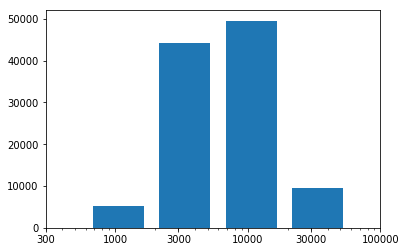

In [42]:
bin_edges = 10 ** np.arange(2.75, np.log10(df.LoanOriginalAmount.max())+0.5, 0.5)
hist_values = plt.hist(df.LoanOriginalAmount, bins = bin_edges, rwidth=0.8)
plt.xscale('log')
tick_locs = [300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(tick_locs, tick_locs);

In [44]:
#Number of Loan Counts by Category
#Number of loan by Year

df_loan_year = df[['ListingKey', 'ListingCreationDate']]
df_loan_year['ListingCreationDate'] =  pd.to_datetime(df_loan_year['ListingCreationDate'])



C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
df_loa_year_gp = df_loan_year.groupby(df_loan_year.ListingCreationDate.dt.year)
df_loa_year_gp = df_loa_year_gp.count()[['ListingKey']].reset_index()

In [46]:
df_loa_year_gp.head()

,ListingCreationDate,ListingKey
0,2006,3076
1,2007,9225
2,2008,11240
3,2009,2206
4,2010,5530


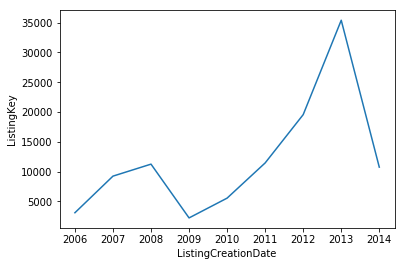

In [47]:
sns.lineplot(x="ListingCreationDate", y="ListingKey", data=df_loa_year_gp)

In [48]:
df_loan_amt_year = df[[ 'ListingCreationDate', 'LoanOriginalAmount']]
df_loan_amt_year_gp = df_loan_amt_year.groupby(df_loan_year.ListingCreationDate.dt.year)
df_loan_amt_year_gp = df_loan_amt_year_gp.sum()[['LoanOriginalAmount']].reset_index()

df_loan_amt_year_gp

,ListingCreationDate,LoanOriginalAmount
0,2006,15365212
1,2007,66782198
2,2008,67045997
3,2009,9692013
4,2010,26775582
5,2011,76711783
6,2012,154033169
7,2013,375740433
8,2014,127900565


In [49]:
df.ListingCreationDate.max()

'2014-03-10 12:20:53.760000000'

In [50]:
df.ListingCreationDate.min()

'2006-04-19 00:14:12'

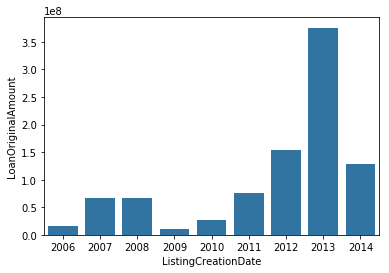

In [51]:
base_color = sns.color_palette()[0]
sns.barplot(data=df_loan_amt_year_gp, x= 'ListingCreationDate', y='LoanOriginalAmount', color=base_color);

# Box Plot for LoanAmount and ListingCategory.
# Voilin plot for LoanAmount and LoanStatus
# Loan Status vs Occupation
# APR vs Loan Amount 
# Loan Amount vs DebtToIncomeRatio

In [52]:
def update_loan_status(dataFrame=None):
    
    if dataFrame['LoanStatus'] is not None:
        if  "past due" in str(dataFrame['LoanStatus']).lower():
            return "Past Due"
        else: 
            return str(dataFrame['LoanStatus'])
    else:
        return None
    
df['NewLoanStatus'] = df.apply(update_loan_status, axis = 1)
df.NewLoanStatus.unique()

array(['Completed', 'Chargedoff', 'Defaulted', 'Current', 'Past Due',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


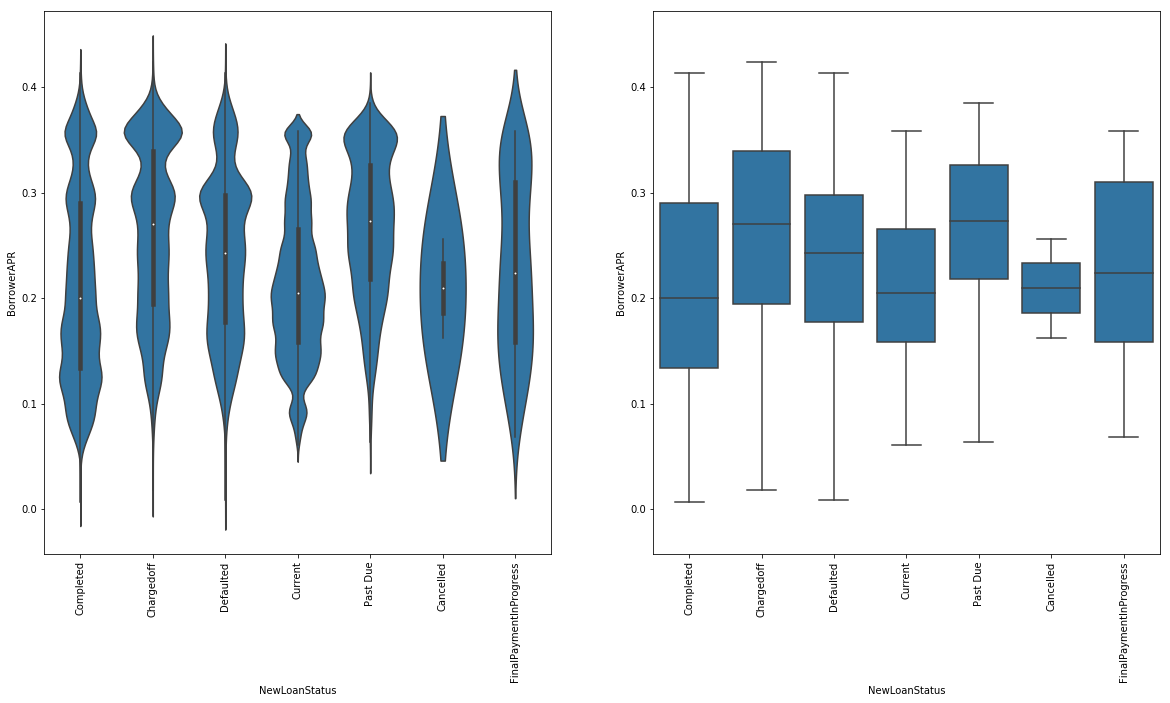

In [53]:
plt.figure(figsize = (20, 10))
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df, x = 'NewLoanStatus', y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation=90)

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'NewLoanStatus', y = 'BorrowerAPR', color = base_color)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot
plt.xticks(rotation=90);

C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


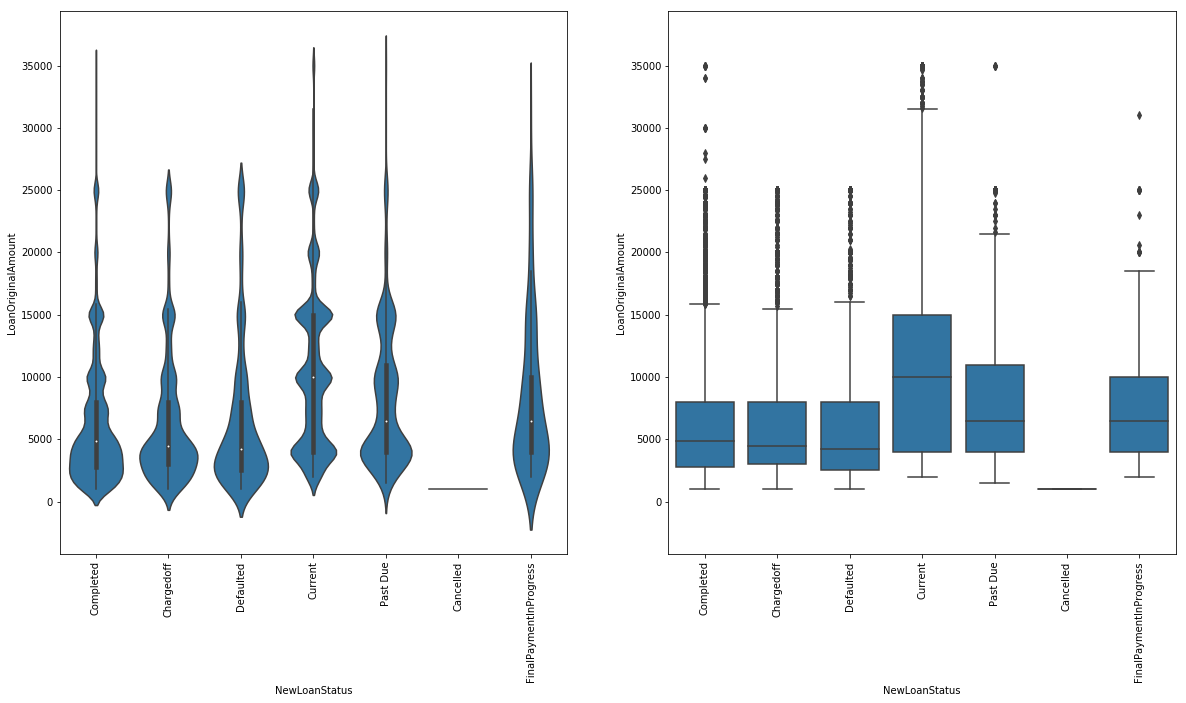

In [54]:
plt.figure(figsize = (20, 10))
base_color = sns.color_palette()[0]


# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df, x = 'NewLoanStatus', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation=90)

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'NewLoanStatus', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot
plt.xticks(rotation=90);

C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.]),
 <a list of 7 Text xticklabel objects>)

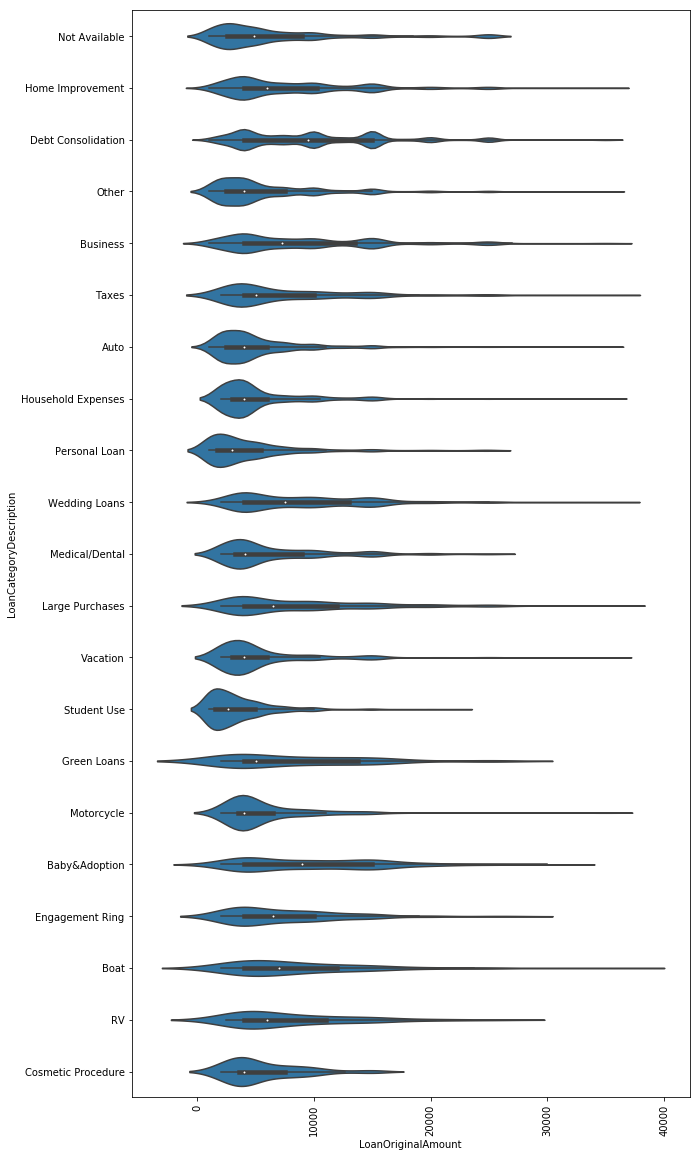

In [55]:

plt.figure(figsize=(10,20))
sns.violinplot(data = df, y = 'LoanCategoryDescription', x = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation=90)


C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


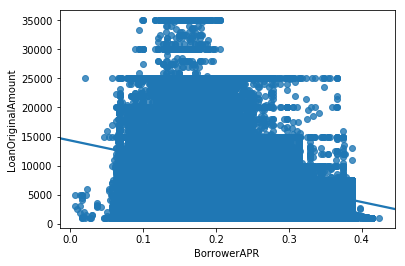

In [56]:
sns.regplot(df.BorrowerAPR, df.LoanOriginalAmount);

In [57]:
df[['BorrowerAPR', 'LoanOriginalAmount']].corr()

,BorrowerAPR,LoanOriginalAmount
BorrowerAPR,1.000000,-0.340925
LoanOriginalAmount,-0.340925,1.000000


C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


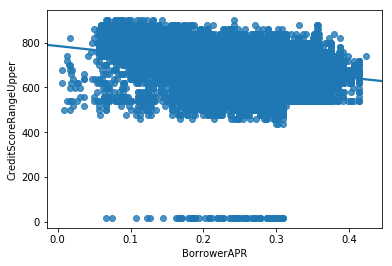

In [58]:
sns.regplot(df.BorrowerAPR, df.CreditScoreRangeUpper);

C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


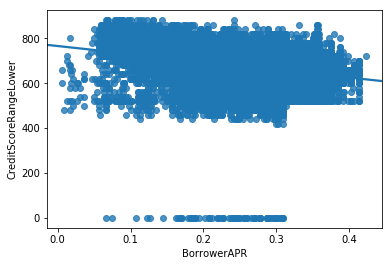

In [59]:
sns.regplot(df.BorrowerAPR, df.CreditScoreRangeLower);

In [60]:
df[['BorrowerAPR', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'LoanOriginalAmount', 'DebtToIncomeRatio', ]].corr()

,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper,LoanOriginalAmount,DebtToIncomeRatio
BorrowerAPR,1.000000,-0.452382,-0.452382,-0.340925,0.061844
CreditScoreRangeLower,-0.452382,1.000000,1.000000,0.334026,-0.014630
CreditScoreRangeUpper,-0.452382,1.000000,1.000000,0.334026,-0.014630
LoanOriginalAmount,-0.340925,0.334026,0.334026,1.000000,0.006263
DebtToIncomeRatio,0.061844,-0.014630,-0.014630,0.006263,1.000000


In [61]:
def get_new_loan_status(dataFrame=None):
    
    if str(dataFrame['NewLoanStatus']) in ['Completed', 'Cancelled', 'Current', 'FinalPaymentInProgress' ]:
        return "Good"
    else:
        return "Bad"

df['ModifiedLoanState'] = df.apply(get_new_loan_status, axis=1)

In [62]:
df['ListingCreationDate'] =  pd.to_datetime(df['ListingCreationDate'])
df_loan_status_year_occupation = df[['ListingCreationDate', 'ModifiedLoanState', 'Occupation']]
df_loan_status_year_occupation_gp = df_loan_status_year_occupation.groupby([df_loan_status_year_occupation.ListingCreationDate.dt.year, 'ModifiedLoanState', 'Occupation'])
df_loan_status_year_occupation_gp = df_loan_status_year_occupation_gp.count()
df_loan_status_year_occupation_gp.rename(index=str, columns={"ListingCreationDate": "Count"}, inplace=True)
df_loan_status_year_occupation_gp = df_loan_status_year_occupation_gp.reset_index()

In [63]:
df_loan_status_year_occupation_gp.Occupation.unique()

is_chemical = df_loan_status_year_occupation_gp.Occupation == 'Engineer - Chemical'
is_electrical = df_loan_status_year_occupation_gp.Occupation == 'Engineer - Electrical'
is_mechanical = df_loan_status_year_occupation_gp.Occupation == 'Engineer - Mechanical'
is_computer_programmer = df_loan_status_year_occupation_gp.Occupation == 'Computer Programmer'


df_loan_status_year_occupation_gp_filtered = df_loan_status_year_occupation_gp[is_chemical | \
                                                                               is_electrical | \
                                                                               is_computer_programmer | \

                                                                               is_mechanical]


C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


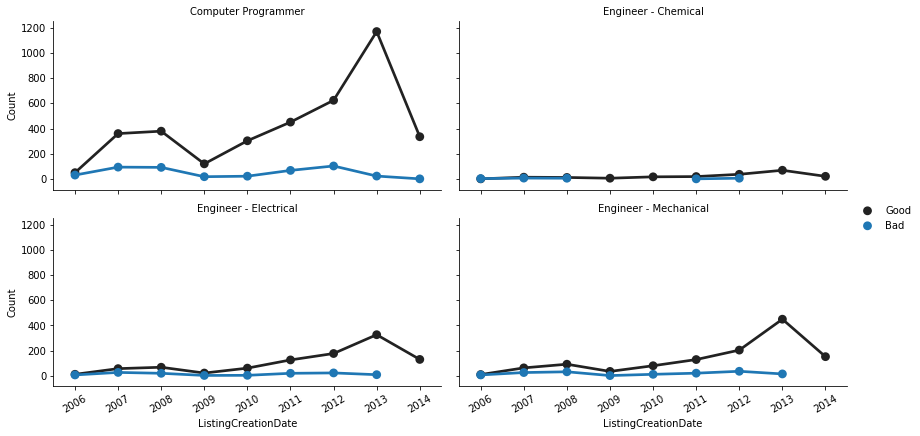

In [64]:
g = sns.FacetGrid(data = df_loan_status_year_occupation_gp_filtered, col = 'Occupation',  col_wrap=2, aspect=2)
g.map(sns.pointplot, 'ListingCreationDate', 'Count', 'ModifiedLoanState' , hue_order=['Good', 'Bad']).add_legend()
g.set_titles('{col_name}')
g.set_xticklabels(rotation=30);


In [65]:
df_loan_status_year_occupation = df[['ListingCreationDate', 'NewLoanStatus', 'Occupation']]
df_loan_status_year_occupation_gp = df_loan_status_year_occupation.groupby([df_loan_status_year_occupation.ListingCreationDate.dt.year, 'NewLoanStatus', 'Occupation'])
df_loan_status_year_occupation_gp = df_loan_status_year_occupation_gp.count()
df_loan_status_year_occupation_gp.rename(index=str, columns={"ListingCreationDate": "Count"}, inplace=True)
df_loan_status_year_occupation_gp = df_loan_status_year_occupation_gp.reset_index()

In [66]:
is_chemical = df_loan_status_year_occupation_gp.Occupation == 'Engineer - Chemical'
is_electrical = df_loan_status_year_occupation_gp.Occupation == 'Engineer - Electrical'
is_mechanical = df_loan_status_year_occupation_gp.Occupation == 'Engineer - Mechanical'
is_computer_programmer = df_loan_status_year_occupation_gp.Occupation == 'Computer Programmer'


df_loan_status_year_occupation_gp_filtered = df_loan_status_year_occupation_gp[is_chemical | \
                                                                               is_electrical | \
                                                                               is_computer_programmer | \

                                                                               is_mechanical]

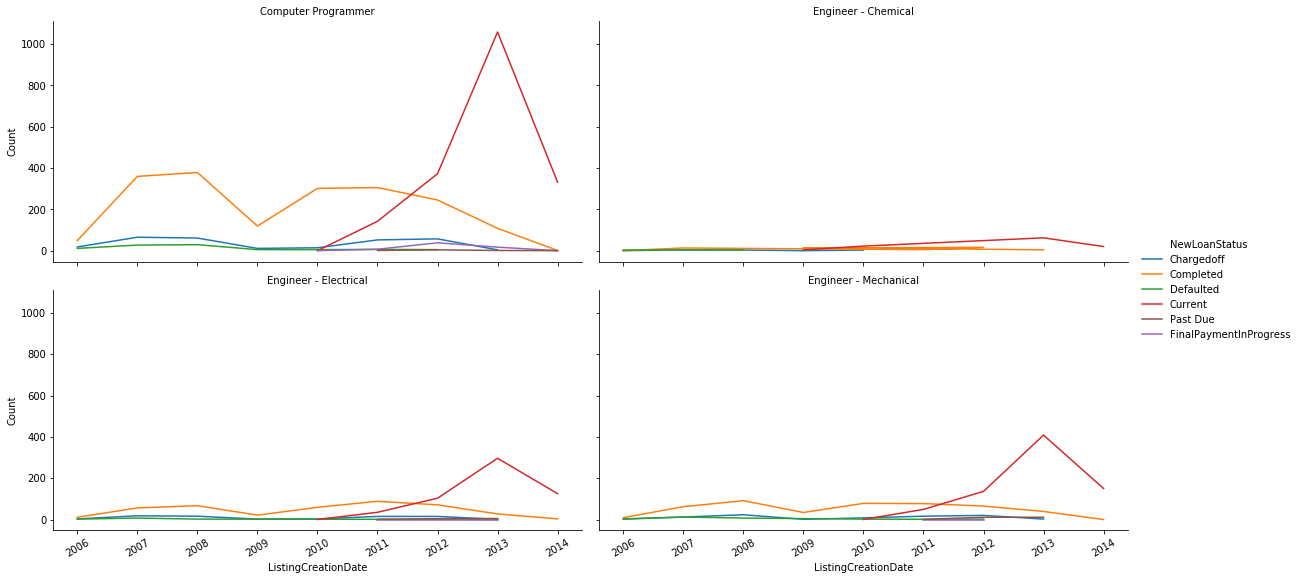

In [67]:
g = sns.FacetGrid(data = df_loan_status_year_occupation_gp_filtered, col = 'Occupation',  col_wrap=2, aspect=2, height=4)
g.map(sns.lineplot, 'ListingCreationDate', 'Count', 'NewLoanStatus' ).add_legend()
g.set_titles('{col_name}')
g.set_xticklabels(rotation=30);


In [68]:
df.LoanCategoryDescription.unique()

array(['Not Available', 'Home Improvement', 'Debt Consolidation', 'Other',
       'Business', 'Taxes', 'Auto', 'Household Expenses', 'Personal Loan',
       'Wedding Loans', 'Medical/Dental', 'Large Purchases', 'Vacation',
       'Student Use', 'Green Loans', 'Motorcycle', 'Baby&Adoption',
       'Engagement Ring', 'Boat', 'RV', 'Cosmetic Procedure'],
      dtype=object)

In [69]:
df_loan_category_year_amt = df[['ListingCreationDate', 'LoanCategoryDescription', 'LoanOriginalAmount']]
df_loan_category_year_amt_gp = df_loan_category_year_amt.groupby([df_loan_category_year_amt.ListingCreationDate.dt.year, 'LoanCategoryDescription', 'LoanOriginalAmount'])
df_loan_category_year_amt_gp = df_loan_category_year_amt_gp.sum()
df_loan_category_year_amt_gp = df_loan_category_year_amt_gp.reset_index()

In [70]:
df_loan_category_year_amt_gp.head()

,ListingCreationDate,LoanCategoryDescription,LoanOriginalAmount
0,2006,Not Available,1000
1,2006,Not Available,1001
2,2006,Not Available,1005
3,2006,Not Available,1025
4,2006,Not Available,1040


C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Karthick\Anaconda3\envs\my_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


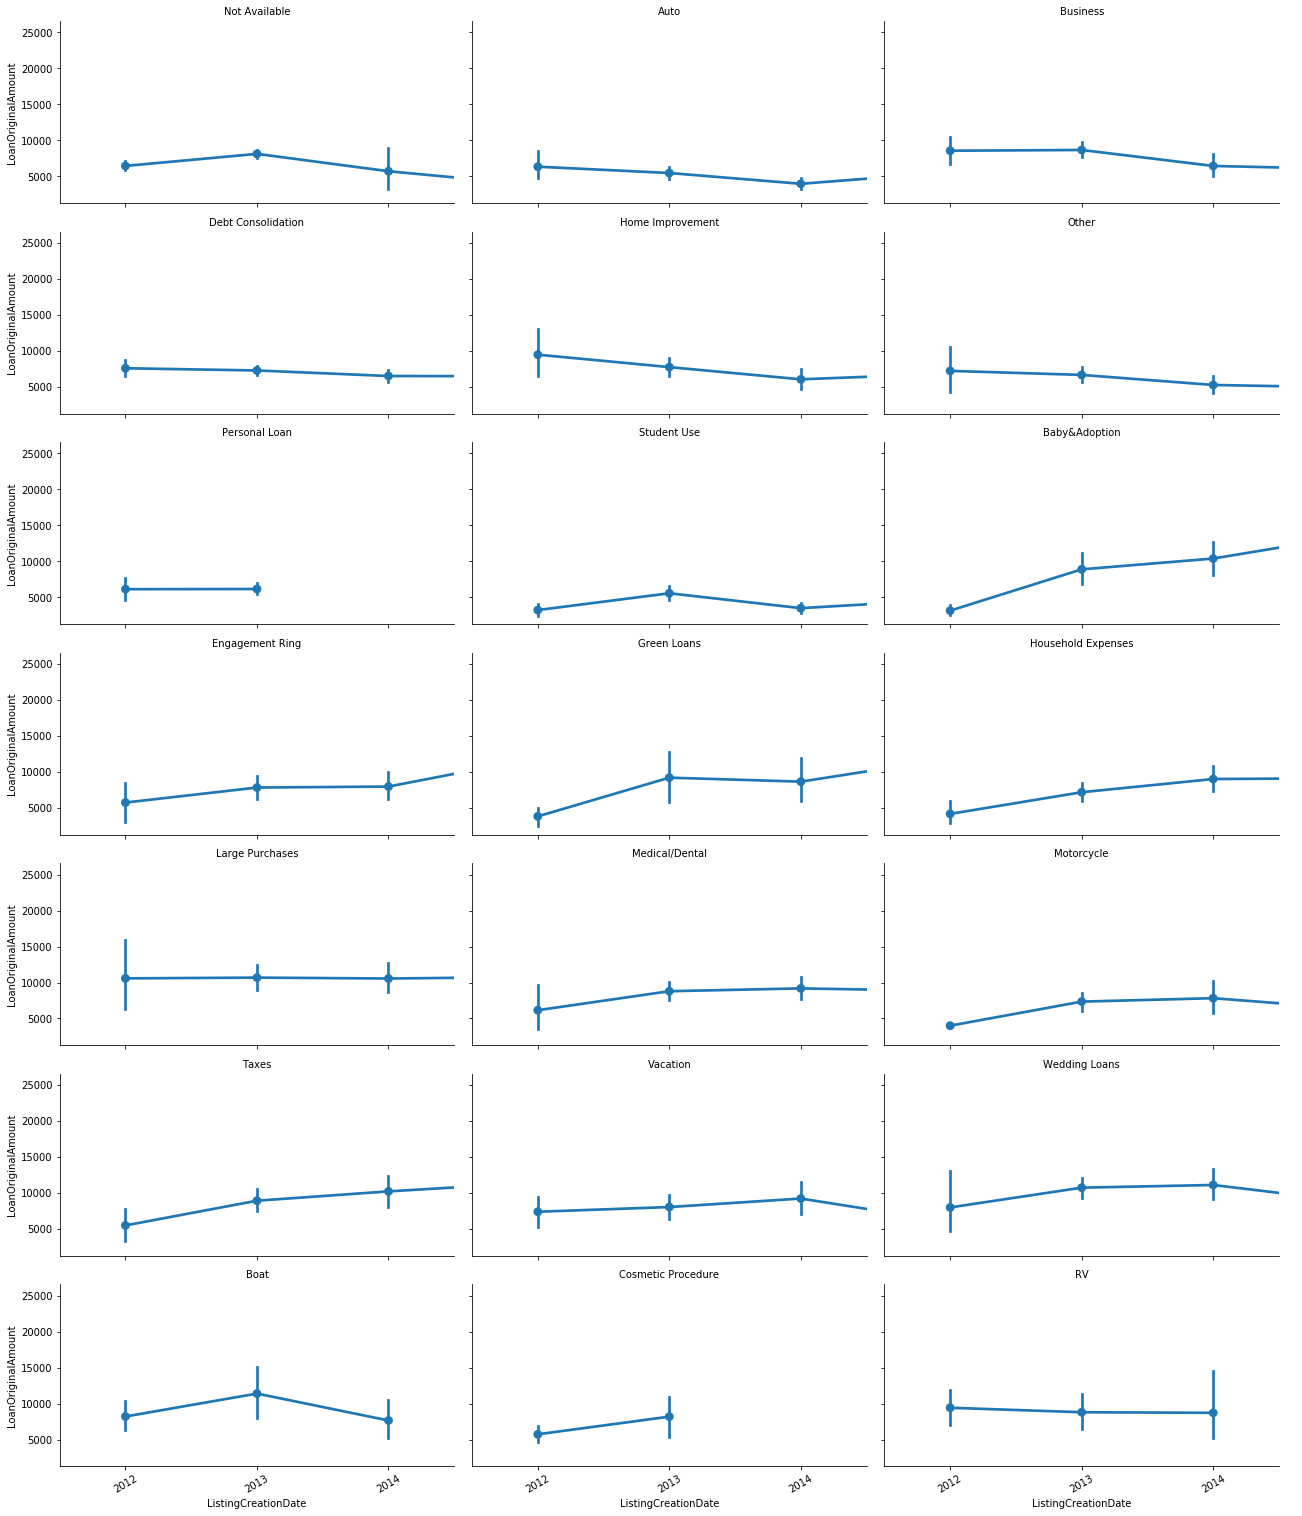

In [71]:
g = sns.FacetGrid(data = df_loan_category_year_amt_gp, col = 'LoanCategoryDescription',  col_wrap=3, aspect=2, height=3)
g.map(sns.pointplot, 'ListingCreationDate', 'LoanOriginalAmount' ).add_legend()
g.set_titles('{col_name}')
g.set_xticklabels(rotation=30);

In [95]:
is_chemical = df.Occupation == 'Engineer - Chemical'
is_electrical = df.Occupation == 'Engineer - Electrical'
is_mechanical = df.Occupation == 'Engineer - Mechanical'
is_computer_programmer = df.Occupation == 'Computer Programmer'


df_occupation_filtered = df[is_chemical | is_electrical | is_computer_programmer |  is_mechanical]
df_loan_year_occupation_income = df_occupation_filtered[['ListingCreationDate', 'Occupation']]
df_loan_year_occupation_income_gp = df_loan_year_occupation_income.groupby([df_loan_year_occupation_income.ListingCreationDate.dt.year, 'Occupation'])
df_loan_year_occupation_income_gp = df_loan_year_occupation_income_gp.count()

df_loan_year_occupation_income_gp.rename(index=str, columns={'ListingCreationDate': 'ApplicantCount'}, inplace=True)
df_loan_year_occupation_income_gp = df_loan_year_occupation_income_gp.reset_index()

In [96]:
df_loan_year_occupation_income_gp.columns

Index(['ListingCreationDate', 'Occupation', 'ApplicantCount'], dtype='object')

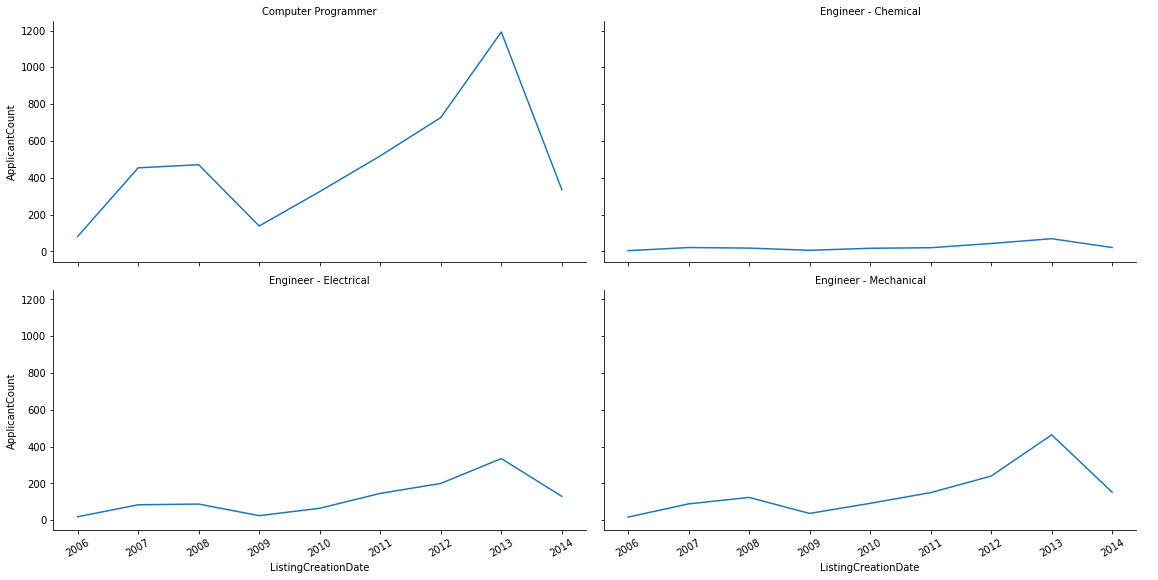

In [97]:
g = sns.FacetGrid(data = df_loan_year_occupation_income_gp, col = 'Occupation',  col_wrap=2, aspect=2, height=4)
g.map(sns.lineplot, 'ListingCreationDate', 'ApplicantCount' ).add_legend()
g.set_titles('{col_name}')
g.set_xticklabels(rotation=30);